### PERSIAPAN DATA


In [47]:
import pandas as pd
import numpy as np

In [48]:
file_path = r'D:\CognoRise Intern\fake_news_classification\archive (2)\news.csv'
df = pd.read_csv(file_path)

df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [49]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [50]:
# Hitung jumlah ulasan per label
label_counts = df['label'].value_counts()

# Menampilkan jumlah untuk setiap kategori
real = label_counts.get('REAL', 0)
fake = label_counts.get('FAKE', 0)

print(f"Jumlah data real: {real}")
print(f"Jumlah data fake: {fake}")


Jumlah data real: 3171
Jumlah data fake: 3164


In [51]:
len(df)

6335

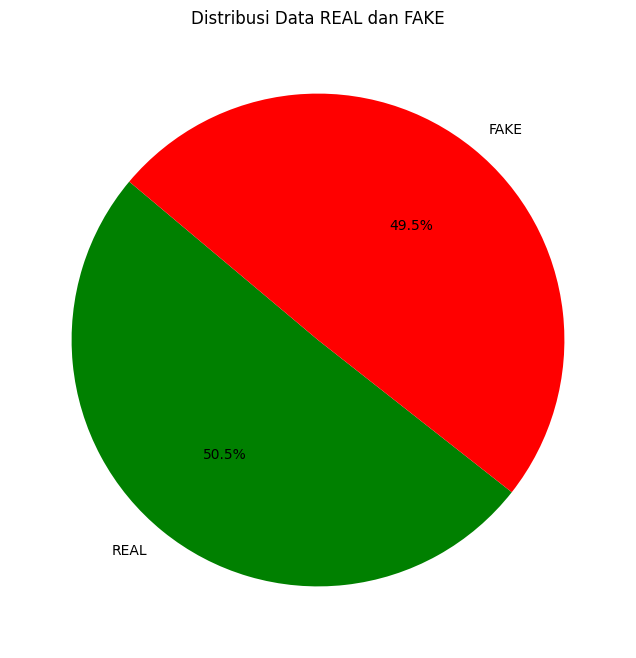

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Redefining the counts and labels for the pie chart
label_counts = {'REAL': 3200, 'FAKE': 3135}  # Replace with actual data if needed
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Membuat plot pie chart untuk distribusi data
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Distribusi Data REAL dan FAKE')
plt.show()


#### EDA



In [53]:
# menampilkan info deskripsi dataset
df.describe(include='all')

,Unnamed: 0,title,text,label
count,6335.000000,6335,6335,6335
unique,NaN,6256,6060,2
top,NaN,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,NaN,5,58,3171
mean,5280.415627,NaN,NaN,NaN
std,3038.503953,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN
25%,2674.500000,NaN,NaN,NaN
50%,5271.000000,NaN,NaN,NaN
75%,7901.000000,NaN,NaN,NaN


In [54]:
### DROPPING UNNECESSARY COLUMNS

df = df.drop(['Unnamed: 0'], axis=1)
 

In [55]:
# Check the number of null values in each column
print(df.isnull().sum())


title    0
text     0
label    0
dtype: int64


In [56]:
# Check for duplicate rows
print(df.duplicated().sum())

29


In [57]:
df = df.drop_duplicates(subset=['text','title'])

In [58]:
# Menghapus duplikat
df = df.drop_duplicates()


In [59]:
len(df)

6306

## PRE-PROCESSING DATA

#### CLEANING DATASET

In [60]:
import re

def clean_text(text):
    text = re.sub(r'(?:http?\://|https?\://|www\.)\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)  
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'_', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [61]:
# Apply the function to the 'ulasan' column
df['title_cleaned'] = df['title'].apply(clean_text)
df['text_cleaned'] = df['text'].apply(clean_text)

In [62]:
df

,title,text,label,title_cleaned,text_cleaned
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary s Fear,Daniel Greenfield a Shillman Journalism Fellow...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy,U S Secretary of State John F Kerry said Monda...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,Kaydee King KaydeeKing November The lesson fro...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York Why This Primary Matters,It s primary day in New York and front runners...
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can t find emails fro...,The State Department told the Republican Natio...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The P in PBS Should Stand for Plutocratic or P...,The P in PBS Should Stand for Plutocratic or P...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti Trump Protesters Are Tools of the Oligarc...,Anti Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,In Ethiopia Obama seeks progress on peace secu...,ADDIS ABABA Ethiopia President Obama convened ...


#### DATA NORMALIZATION


##### lower case


In [63]:
# Function to perform case folding
def casefoldingText(text):
    text = text.lower()
    return text

In [64]:
df['title_cleaned'] = df['title_cleaned'].apply(casefoldingText)
df['text_cleaned'] = df['text_cleaned'].apply(casefoldingText)

In [65]:
df

,title,text,label,title_cleaned,text_cleaned
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,you can smell hillary s fear,daniel greenfield a shillman journalism fellow...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monda...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november the lesson fro...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,the battle of new york why this primary matters,it s primary day in new york and front runners...
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,state department says it can t find emails fro...,the state department told the republican natio...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,the p in pbs should stand for plutocratic or p...,the p in pbs should stand for plutocratic or p...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,anti trump protesters are tools of the oligarc...,anti trump protesters are tools of the oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,in ethiopia obama seeks progress on peace secu...,addis ababa ethiopia president obama convened ...


### tokenize


In [66]:
import nltk

df['title_tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['title_cleaned']), axis=1)
df['text_tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['text_cleaned']), axis=1)

#### remove_stopword

In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords_nltk(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(' '.join(text))
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anasafira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anasafira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [69]:
df['title_no_stopwords'] = df['title_tokenized'].apply(remove_stopwords_nltk)
df['text_no_stopwords'] = df['text_tokenized'].apply(remove_stopwords_nltk)

In [70]:
df

,title,text,label,title_cleaned,text_cleaned,title_tokenized,text_tokenized,title_no_stopwords,text_no_stopwords
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,you can smell hillary s fear,daniel greenfield a shillman journalism fellow...,"[you, can, smell, hillary, s, fear]","[daniel, greenfield, a, shillman, journalism, ...","[smell, hillary, fear]","[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,"[watch, the, exact, moment, paul, ryan, commit...","[google, pinterest, digg, linkedin, reddit, st...","[watch, exact, moment, paul, ryan, committed, ...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monda...,"[kerry, to, go, to, paris, in, gesture, of, sy...","[u, s, secretary, of, state, john, f, kerry, s...","[kerry, go, paris, gesture, sympathy]","[u, secretary, state, john, f, kerry, said, mo..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november the lesson fro...,"[bernie, supporters, on, twitter, erupt, in, a...","[kaydee, king, kaydeeking, november, the, less...","[bernie, supporters, twitter, erupt, anger, dn...","[kaydee, king, kaydeeking, november, lesson, t..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,the battle of new york why this primary matters,it s primary day in new york and front runners...,"[the, battle, of, new, york, why, this, primar...","[it, s, primary, day, in, new, york, and, fron...","[battle, new, york, primary, matters]","[primary, day, new, york, front, runners, hill..."
...,...,...,...,...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,state department says it can t find emails fro...,the state department told the republican natio...,"[state, department, says, it, can, t, find, em...","[the, state, department, told, the, republican...","[state, department, says, find, emails, clinto...","[state, department, told, republican, national..."
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,the p in pbs should stand for plutocratic or p...,the p in pbs should stand for plutocratic or p...,"[the, p, in, pbs, should, stand, for, plutocra...","[the, p, in, pbs, should, stand, for, plutocra...","[p, pbs, stand, plutocratic, pentagon]","[p, pbs, stand, plutocratic, pentagon, posted,..."
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,anti trump protesters are tools of the oligarc...,anti trump protesters are tools of the oligarc...,"[anti, trump, protesters, are, tools, of, the,...","[anti, trump, protesters, are, tools, of, the,...","[anti, trump, protesters, tools, oligarchy, in...","[anti, trump, protesters, tools, oligarchy, re..."
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,in ethiopia obama seeks progress on peace secu...,addis ababa ethiopia president obama convened ...,"[in, ethiopia, obama, seeks, progress, on, pea...","[addis, ababa, ethiopia, president, obama, con...","[ethiopia, obama, seeks, progress, peace, secu...","[addis, ababa, ethiopia, president, obama, con..."


In [71]:
df['all_title_text'] = df['title_no_stopwords'] + df['text_no_stopwords']

In [76]:
# Menggabungkan dua kolom menjadi string dengan spasi di antaranya
df['all_title_text'] = df['title_no_stopwords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x) + ' ' + df['text_no_stopwords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Pastikan hasil akhir benar-benar dalam bentuk string
df['all_title_text'] = df['all_title_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))


In [77]:
df

,title,text,label,title_cleaned,text_cleaned,title_tokenized,text_tokenized,title_no_stopwords,text_no_stopwords,all_title_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,you can smell hillary s fear,daniel greenfield a shillman journalism fellow...,"[you, can, smell, hillary, s, fear]","[daniel, greenfield, a, shillman, journalism, ...","[smell, hillary, fear]","[daniel, greenfield, shillman, journalism, fel...",smell hillary fear daniel greenfield shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,"[watch, the, exact, moment, paul, ryan, commit...","[google, pinterest, digg, linkedin, reddit, st...","[watch, exact, moment, paul, ryan, committed, ...","[google, pinterest, digg, linkedin, reddit, st...",watch exact moment paul ryan committed politic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monda...,"[kerry, to, go, to, paris, in, gesture, of, sy...","[u, s, secretary, of, state, john, f, kerry, s...","[kerry, go, paris, gesture, sympathy]","[u, secretary, state, john, f, kerry, said, mo...",kerry go paris gesture sympathy u secretary st...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november the lesson fro...,"[bernie, supporters, on, twitter, erupt, in, a...","[kaydee, king, kaydeeking, november, the, less...","[bernie, supporters, twitter, erupt, anger, dn...","[kaydee, king, kaydeeking, november, lesson, t...",bernie supporters twitter erupt anger dnc trie...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,the battle of new york why this primary matters,it s primary day in new york and front runners...,"[the, battle, of, new, york, why, this, primar...","[it, s, primary, day, in, new, york, and, fron...","[battle, new, york, primary, matters]","[primary, day, new, york, front, runners, hill...",battle new york primary matters primary day ne...
...,...,...,...,...,...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,state department says it can t find emails fro...,the state department told the republican natio...,"[state, department, says, it, can, t, find, em...","[the, state, department, told, the, republican...","[state, department, says, find, emails, clinto...","[state, department, told, republican, national...",state department says find emails clinton spec...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,the p in pbs should stand for plutocratic or p...,the p in pbs should stand for plutocratic or p...,"[the, p, in, pbs, should, stand, for, plutocra...","[the, p, in, pbs, should, stand, for, plutocra...","[p, pbs, stand, plutocratic, pentagon]","[p, pbs, stand, plutocratic, pentagon, posted,...",p pbs stand plutocratic pentagon p pbs stand p...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,anti trump protesters are tools of the oligarc...,anti trump protesters are tools of the oligarc...,"[anti, trump, protesters, are, tools, of, the,...","[anti, trump, protesters, are, tools, of, the,...","[anti, trump, protesters, tools, oligarchy, in...","[anti, trump, protesters, tools, oligarchy, re...",anti trump protesters tools oligarchy informat...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,in ethiopia obama seeks progress on peace secu...,addis ababa ethiopia president obama convened ...,"[in, ethiopia,

In [78]:
X = df["all_title_text"]
y = df["label"]

print(f'X: {X[:2]}')
print(f'y: {y[:2]}')



X: 0    smell hillary fear daniel greenfield shillman ...
1    watch exact moment paul ryan committed politic...
Name: all_title_text, dtype: object
y: 0    FAKE
1    FAKE
Name: label, dtype: object


In [79]:
# Mapping label ke angka
label_mapping = {'REAL': 0, 'FAKE': 1}
y_encoded = [label_mapping[label] for label in y]

## SPLIT DATA

In [80]:
from sklearn.model_selection import train_test_split

# split data train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# cek distribusi label di train dan test
print("Distribusi label di train set:")
print(pd.Series(y_train).value_counts())
print("Distribusi label di test set:")
print(pd.Series(y_test).value_counts())

Distribusi label di train set:
0    2523
1    2521
Name: count, dtype: int64
Distribusi label di test set:
1    631
0    631
Name: count, dtype: int64


In [81]:
import numpy as np

# Mengonversi list ke numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Mencetak shape dari array yang telah dikonversi
print(f'X_train shape: {X_train.shape} \ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape} \ny_test shape: {y_test.shape}')


X_train shape: (5044,) 
y_train shape: (5044,)
X_test shape: (1262,) 
y_test shape: (1262,)


In [82]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize
vectorizer = CountVectorizer(dtype=np.float32)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [99]:
# Import necessary libraries and models
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Ignore warnings related to convergence
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize the models dictionary with the chosen 3 models
models = {
    'XGBoost': XGBClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

# Dictionary to store the accuracy results
results_no_feat_eng = {}

# Loop through each model, train it, and evaluate accuracy
for name, model in tqdm(models.items()):
    try:
        model.fit(X_train_vectorized, y_train)  # Train the model
        predictions = model.predict(X_test_vectorized)  # Make predictions

        # Store the accuracy score in the results dictionary
        results_no_feat_eng[name] = accuracy_score(y_test, predictions)
    except Exception as e:
        # Print an error message if a model fails to train
        print(f"Model {name} failed to train: {e}")

# Convert results to a DataFrame for better visualization
results_no_feat_eng_df = pd.DataFrame.from_dict(results_no_feat_eng, orient='index', columns=['Accuracy'])
print(results_no_feat_eng_df)


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [01:13<00:00, 24.38s/it]

                        Accuracy
XGBoost                 0.927892
Support Vector Machine  0.870048
Naive Bayes             0.890650


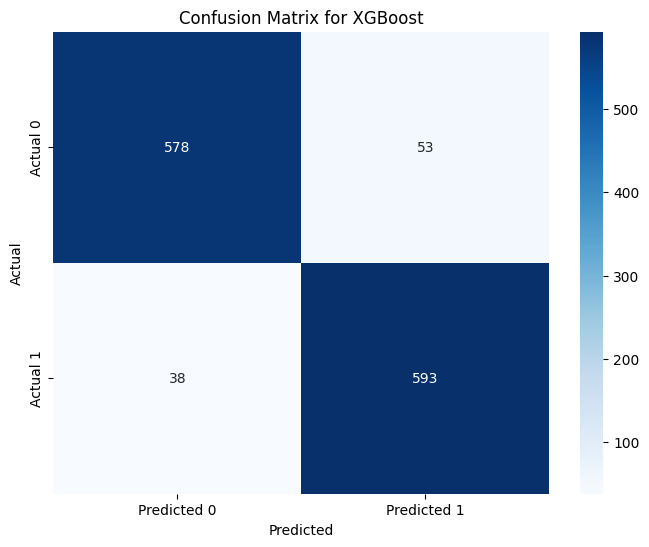

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       631
           1       0.92      0.94      0.93       631

    accuracy                           0.93      1262
   macro avg       0.93      0.93      0.93      1262
weighted avg       0.93      0.93      0.93      1262



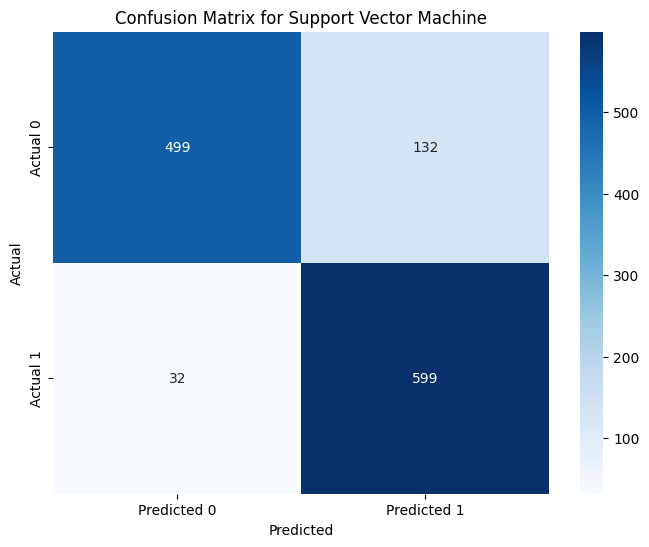

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       631
           1       0.82      0.95      0.88       631

    accuracy                           0.87      1262
   macro avg       0.88      0.87      0.87      1262
weighted avg       0.88      0.87      0.87      1262



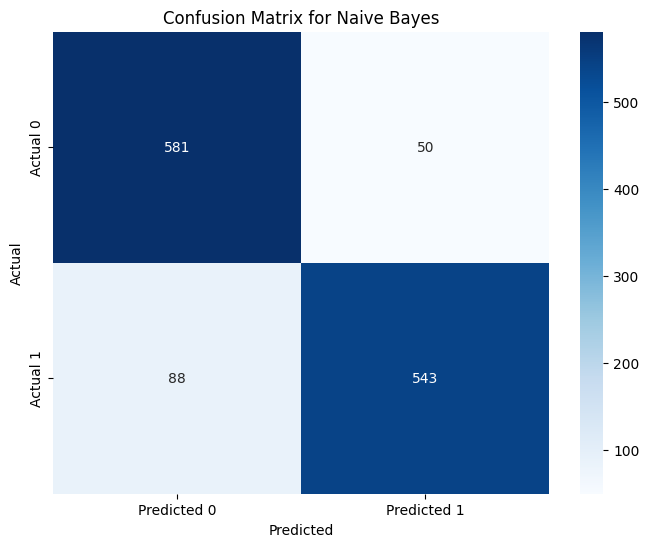

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       631
           1       0.92      0.86      0.89       631

    accuracy                           0.89      1262
   macro avg       0.89      0.89      0.89      1262
weighted avg       0.89      0.89      0.89      1262



In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Loop to evaluate and display the confusion matrix and classification report for each model
for name, model in models.items():
    try:
        # Ensure the model is trained and make predictions on the test set
        predictions = model.predict(X_test_vectorized)

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, predictions)
        
        # Visualize the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))  # Set the size of the plot
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted 0', 'Predicted 1'], 
                    yticklabels=['Actual 0', 'Actual 1'])  # Annotate with counts and set color
        plt.title(f'Confusion Matrix for {name}')  # Title for the plot
        plt.xlabel('Predicted')  # Label for the x-axis
        plt.ylabel('Actual')  # Label for the y-axis
        plt.show()  # Display the plot
        
        # Print the classification report with precision, recall, f1-score, and support
        print(f"Classification Report for {name}:")
        print(classification_report(y_test, predictions))

    except Exception as e:
        # Print an error message if the evaluation fails for a model
        print(f"Could not display evaluation for {name}: {e}")


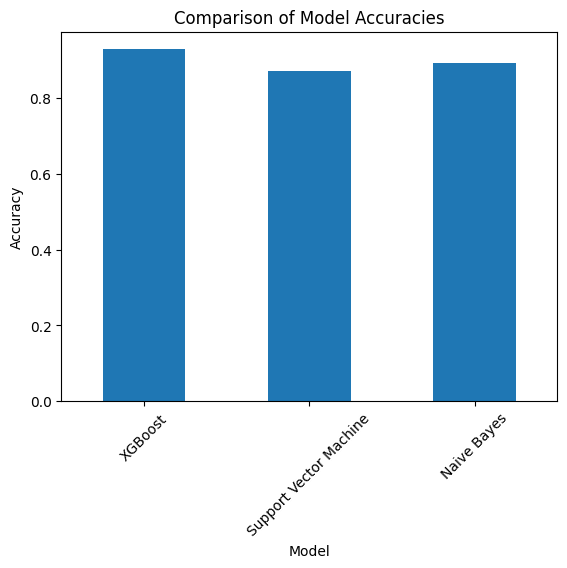

In [109]:
# Visualize model accuracies
results_no_feat_eng_df.plot(kind='bar', legend=False)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [110]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train_vectorized, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


XGBoost Cross-Validation Accuracy: 0.9126 ± 0.0091
Support Vector Machine Cross-Validation Accuracy: 0.8703 ± 0.0061
Naive Bayes Cross-Validation Accuracy: 0.8908 ± 0.0138


In [113]:
# Pastikan XGBoost adalah model terbaik yang sudah dilatih sebelumnya
best_model = models['XGBoost']

# Loop untuk membuat prediksi dengan model terbaik
sample_texts = [
    "This product is amazing and has exceeded my expectations!",
    "The service was really bad and I wouldn't recommend it to anyone.",
    "Neutral experience, not bad but not great either."
]

# Vectorize input texts
vectorized_texts = vectorizer.transform(sample_texts)

# Membuat prediksi dengan model terbaik
for text, vectorized_input in zip(sample_texts, vectorized_texts):
    try:
        prediction = best_model.predict(vectorized_input)
        print(f"Prediction for '{text}': {prediction[0]}")
    except Exception as e:
        print(f"Failed to make a prediction for '{text}': {e}")


Prediction for 'This product is amazing and has exceeded my expectations!': 1
Prediction for 'The service was really bad and I wouldn't recommend it to anyone.': 1
Prediction for 'Neutral experience, not bad but not great either.': 1
